In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5])

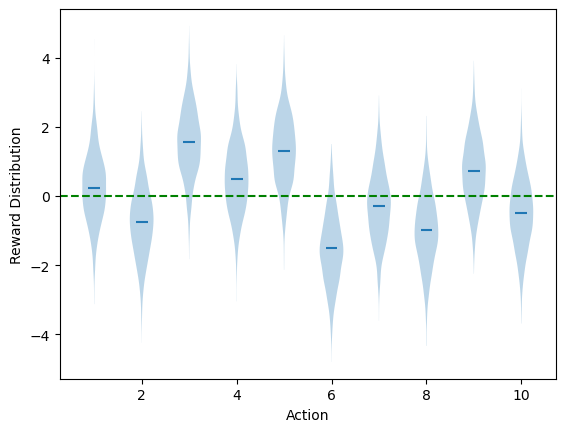

In [2]:
plt.violinplot(np.random.randn(2000,10) + q_of_a,showmeans=True, showextrema=False);
plt.axhline(0,linestyle='--', c= 'g')
plt.xlabel('Action')
plt.ylabel('Reward Distribution')
plt.savefig('figures/Figure2_1.png')
plt.show()

In [3]:
class BanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		return np.random.randn() + self.q_of_a[action]

def e_greedy_bandit(env, n_steps, epsilon):
	trajectory = []

	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:

			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		Q_of_a[action] += (reward - Q_of_a[action])/N_of_a[action]

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)


In [4]:
ten_armed_testbed = BanditEnv(q_of_a)

Q_of_a, N_of_a, trajectory = e_greedy_bandit(ten_armed_testbed, 10000, 0.1)
Q_of_a, N_of_a, trajectory[:5]

(array([ 0.32241766, -0.89959167,  1.50856049,  0.46385427,  1.22034334,
        -1.64307286, -0.36045603, -1.05025266,  0.70929031, -0.38065951]),
 array([ 101.,  100., 8847.,   97.,  338.,  107.,  102.,  109.,   96.,
         103.]),
 array([[ 1.        , -0.88398811],
        [ 8.        , -0.3422024 ],
        [ 7.        , -0.25161079],
        [ 4.        ,  1.63836317],
        [ 4.        ,  1.93415352]]))

In [5]:
def average_over_n_runs(n_runs, env, n_steps, epsilon):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = e_greedy_bandit(env,n_steps,epsilon)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs


In [6]:
hist_01, optimal_01 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.1)
hist_001, optimal_001 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.01)
hist_0, optimal_0 = average_over_n_runs(2000, ten_armed_testbed, 1000, 0)

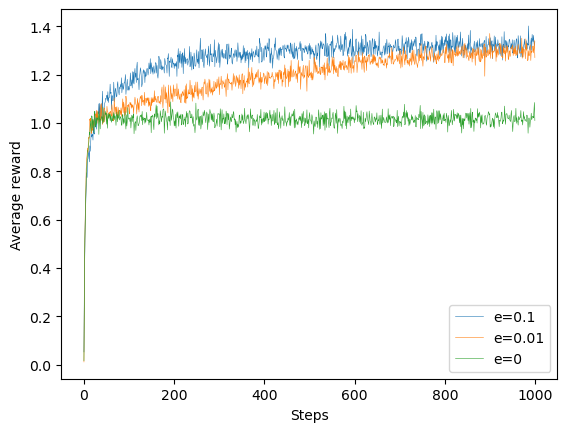

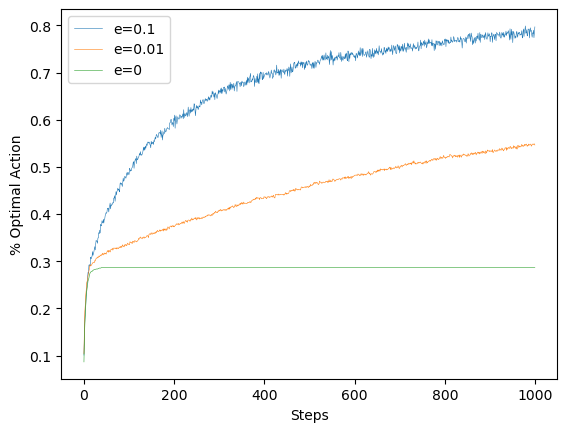

In [7]:
plt.plot(hist_01, linewidth=0.4, label='e=0.1')
plt.plot(hist_001, linewidth=0.4, label='e=0.01')
plt.plot(hist_0, linewidth=0.4, label='e=0')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.savefig('figures/Figure2_2a.png')
plt.show()

plt.plot(optimal_01, linewidth=0.4, label='e=0.1')
plt.plot(optimal_001, linewidth=0.4, label='e=0.01')
plt.plot(optimal_0, linewidth=0.4, label='e=0')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.savefig('figures/Figure2_2b.png')
plt.show()

# Exercise 2.5

In [8]:
class NonStationaryBanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		self.shift_qs()
		return np.random.randn() + q_of_a[action]
	
	def shift_qs(self):
		self.q_of_a += np.random.normal(0,0.1,size=self.q_of_a.shape)

#changing this to include alpha as a constant value
def e_greedy_bandit(env, n_steps, epsilon, alpha = None):
	trajectory = []
	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:

			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		if alpha == None:
			Q_of_a[action] += (reward - Q_of_a[action])/N_of_a[action]
		else:
			Q_of_a[action] += (reward - Q_of_a[action])*alpha

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)

def average_over_n_runs(n_runs, env, n_steps, epsilon, alpha = None):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = e_greedy_bandit(env,n_steps,epsilon, alpha)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs



In [9]:
hist_1_over_n, optimal_1_over_n = average_over_n_runs(200,ten_armed_testbed, 10000, 0.1) # alpha = 1/n
hist_01, optimal_01 = average_over_n_runs(200,ten_armed_testbed, 10000, 0.1, 0.1) # alpha = 0.1
hist_001, optimal_001 = average_over_n_runs(200, ten_armed_testbed, 10000, 0.1, 0.01) # alpha = 0.01

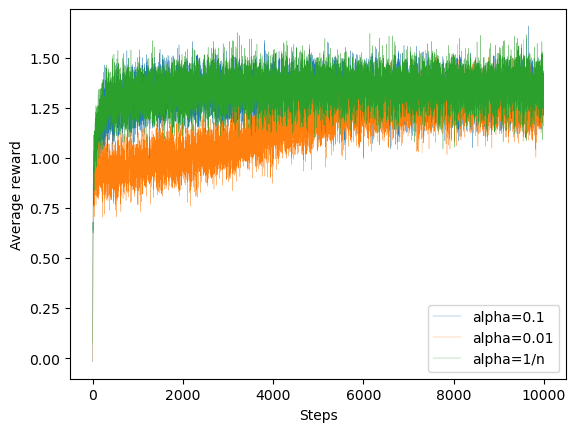

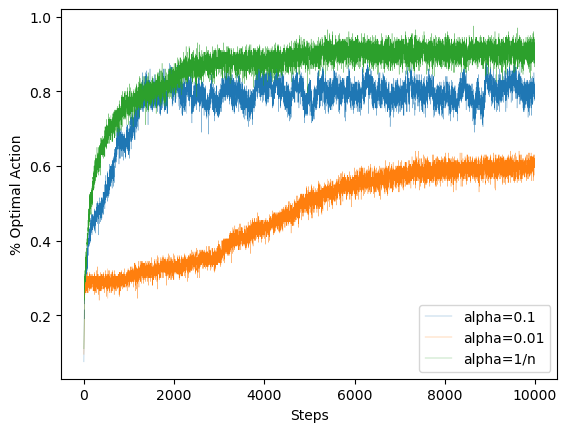

In [10]:
plt.plot(hist_01, linewidth=0.2, label='alpha=0.1')
plt.plot(hist_001, linewidth=0.2, label='alpha=0.01')
plt.plot(hist_1_over_n, linewidth=0.2, label='alpha=1/n')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.savefig('figures/exercise2_5a.png')
plt.show()

plt.plot(optimal_01, linewidth=0.2, label='alpha=0.1')
plt.plot(optimal_001, linewidth=0.2, label='alpha=0.01')
plt.plot(optimal_1_over_n, linewidth=0.2, label='alpha=1/n')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.savefig('figures/exercise2_5b.png')
plt.show()

# Optimism

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5])

class BanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		return np.random.randn() + self.q_of_a[action]

ten_armed_testbed = BanditEnv(q_of_a)

def e_greedy_bandit(env, n_steps, epsilon, Q_init = 0, alpha = None):
	trajectory = []
	Q_of_a = np.zeros(env.a_length) + Q_init
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:
			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		if alpha == None:
			Q_of_a[action] +=(reward - Q_of_a[action])/N_of_a[action]
		else:
			Q_of_a[action] += alpha*(reward-Q_of_a[action])
		

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)

def average_over_n_runs(n_runs, env, n_steps, epsilon, Q_init=0,alpha = None):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = e_greedy_bandit(env,n_steps,epsilon, Q_init, alpha)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs


In [39]:
hist_optimstic, optimal_optimistic = average_over_n_runs(2000,ten_armed_testbed, 1000, 0, 5, 0.1)
hist_0, optimal_0 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.1, 0, 0.1)

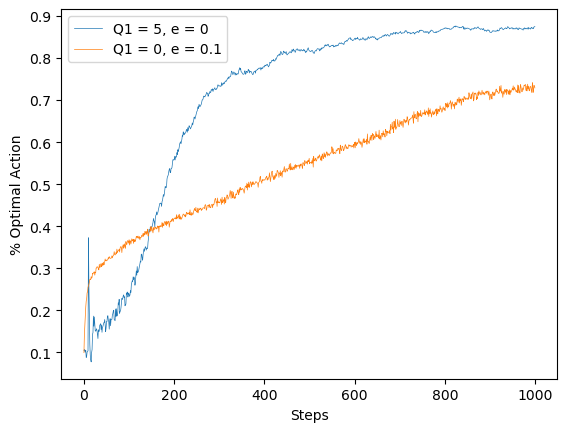

In [40]:
plt.plot(optimal_optimistic, linewidth=0.5, label='Q1 = 5, e = 0')
plt.plot(optimal_0, linewidth=0.5, label='Q1 = 0, e = 0.1')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.savefig('figures/Figure2_3.png')
plt.show()

In [37]:
q, n, traj = e_greedy_bandit(ten_armed_testbed, 1000, 0, 5,0.1)
q

array([0.6501248 , 0.47259032, 1.48396182, 0.54321284, 0.65197935,
       0.64585556, 0.44324123, 0.5935523 , 0.60879992, 0.66884703])

# UCB

In [61]:
def ucb_bandit(env, n_steps, c):
	trajectory = []
	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for t in range(1,n_steps+1):
		unselected_actions = np.where(N_of_a == 0)[0]
		if t <= env.a_length:
			action = np.random.choice(unselected_actions)
		else:
			action = (Q_of_a + c * np.sqrt(np.log(t)/N_of_a)).argmax()
		reward = env.sample_reward(action)

		N_of_a[action] += 1
		Q_of_a[action] += (reward-Q_of_a[action])/N_of_a[action]

		trajectory.append(np.array([action, reward]))

	return Q_of_a, N_of_a, np.array(trajectory)

def average_over_n_runs_ucb(n_runs, env, n_steps, c):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = ucb_bandit(env,n_steps,c)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs



In [62]:
hist_ucb, optimal_ucb = average_over_n_runs_ucb(2000,ten_armed_testbed,1000, 2)
hist_e, optimal_e = average_over_n_runs(2000,ten_armed_testbed,1000,0.1,0)

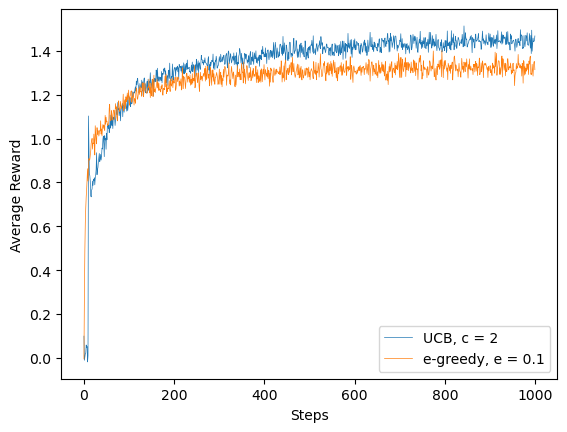

In [63]:
plt.plot(hist_ucb, linewidth=0.5, label='UCB, c = 2')
plt.plot(hist_e, linewidth=0.5, label='e-greedy, e = 0.1')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.savefig('figures/Figure2_4.png')
plt.show()